# Estimación del cultivo

## Métricas de las variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#df = pd.read_csv(r'score/zafras_modelado.csv')
df21_r = pd.read_csv(r'score/zafra21_r.csv')
df22_r = pd.read_csv(r'score/zafra22_r.csv')
df23_r = pd.read_csv(r'score/zafra23_r.csv')
df21_m = pd.read_csv(r'score/zafra21_m.csv')
df22_m = pd.read_csv(r'score/zafra22_m.csv')
df23_m = pd.read_csv(r'score/zafra23_m.csv')
df_r = pd.read_csv(r'score/zafras_r.csv')
df_m = pd.read_csv(r'score/zafras_m.csv')

In [4]:
df21_r['zafra'] = 2021
df21_m['zafra'] = 2021
df22_r['zafra'] = 2022
df22_m['zafra'] = 2022
df23_r['zafra'] = 2023
df23_m['zafra'] = 2023

In [26]:
concat_reales = pd.concat([df21_r, df22_r, df23_r])
concat_modelados = pd.concat([df21_m, df22_m, df23_m])

In [36]:
df23_m.sort_values(by='R2', ascending=False).round(decimals=3)

,Variable,R2,P_values,MSE,Params,RMSE,zafra
13,etc_acum,0.203,[0.0243667 0.26308877],196.913,[ 9.21034937e+01 -2.58694683e-02],14.033,2023
12,lluvia_acum,0.199,[0.01618298 0.26858643],192.920,[ 8.54479694e+01 -7.24784694e-02],13.890,2023
11,msi_mean,0.137,[0.68019851 0.71139081 0.69357561],66.388,[ 333.04464833 -739.5893046 484.81891468],8.148,2023
10,ndmi_mean,0.066,[0.00563384 0.54011688],63.827,[ 63.80795676 -66.96885179],7.989,2023
4,cire_max,0.036,[0.11895403 0.6538918 ],34.734,[43.33021397 5.08921049],5.894,2023
1,ndvi_mean,0.022,[0.29121073 0.7233633 ],21.798,[ 79.9619018 -42.87921213],4.669,2023
8,ndre_max,0.016,[0.46070427 0.76514005],15.578,[38.97453645 29.26845315],3.947,2023
5,cire_mean,0.012,[0.13798362 0.80025555],11.200,[47.17764865 4.68494479],3.347,2023
6,ndre1_max,0.008,[0.39527894 0.82823571],8.249,[43.62298196 23.79535579],2.872,2023
2,gndvi_max,0.008,[0.66532495 0.8362065 ],7.493,[36.88573561 27.70007983],2.737,2023


<Figure size 1000x1000 with 0 Axes>

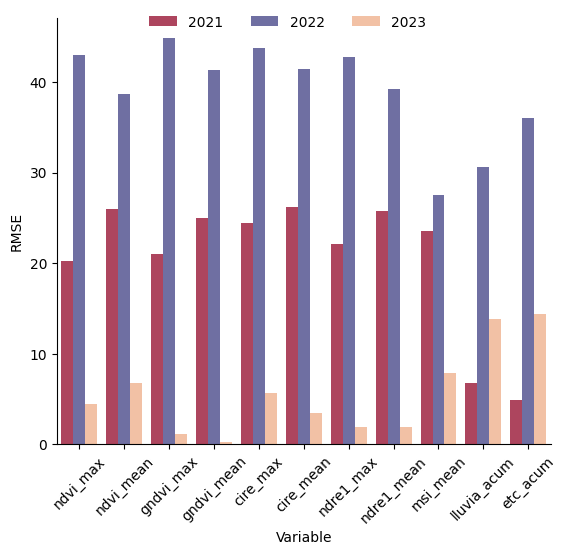

In [48]:
plt.figure(figsize=(10,10))
a = sns.catplot(data=concat_modelados, x='Variable', y='RMSE', kind='bar', hue='zafra', legend='auto', palette=sns.color_palette(['#BE3455', '#6667AB', '#FFBE98']))
sns.move_legend(a, loc='upper center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.xlabel('Variable')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.savefig(r'../../tesis_img/yield_new/zafras_rmse_m.pdf', dpi=150)
plt.show()

## Modelo de regresion

In [16]:
rl21_r = pd.read_csv(r'predicts/zafra21_r.csv')
rl22_r = pd.read_csv(r'predicts//zafra22_r.csv')
rl23_r = pd.read_csv(r'predicts//zafra23_r.csv')
rl21_m = pd.read_csv(r'predicts//zafra21_m.csv')
rl22_m = pd.read_csv(r'predicts//zafra22_m.csv')
rl23_m = pd.read_csv(r'predicts//zafra23_m.csv')
rl_r = pd.read_csv(r'predicts//zafras_r.csv')
rl_m = pd.read_csv(r'predicts//zafras_m.csv')

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vival\AppData\Local\Temp\ipykernel_13240\596472073.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')


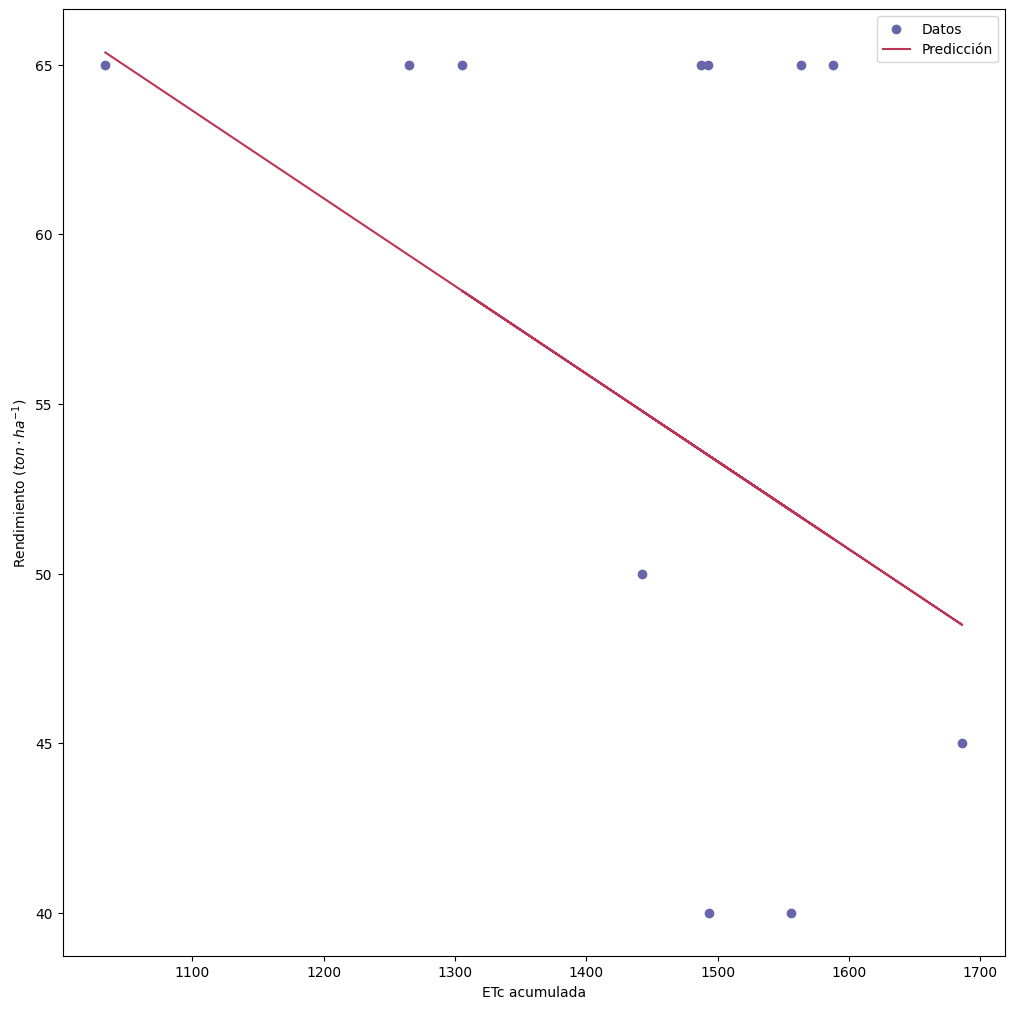

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(rl23_m['etc_acum'], rl23_m['rendimiento'], color='#6667AB', label='Datos')
plt.plot(rl23_m['etc_acum'], rl23_m['etc_acum_pred'], color='#BE3455', label='Predicción')
plt.tight_layout()
plt.legend()
plt.xlabel('ETc acumulada')
plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')
plt.savefig(r'../../tesis_img/yield_new/etc_acum_23_m.pdf', dpi=150)
plt.show()

### latex

In [48]:
rl23_r[['parcela', 'rendimiento', 'ndvi_max_pred', 'ndvi_mean_pred','gndvi_max_pred', 'gndvi_mean_pred', 'cire_max_pred', 'cire_mean_pred', 'ndre1_max_pred', 'ndre1_mean_pred', 'msi_mean_pred']].to_latex(float_format="%.3f")

'\\begin{tabular}{lrrrrrrrrrrr}\n\\toprule\n & parcela & rendimiento & ndvi_max_pred & ndvi_mean_pred & gndvi_max_pred & gndvi_mean_pred & cire_max_pred & cire_mean_pred & ndre1_max_pred & ndre1_mean_pred & msi_mean_pred \\\\\n\\midrule\n0 & 10 & 65 & 55.816 & 50.340 & 56.421 & 51.826 & 54.663 & 53.158 & 55.569 & 50.032 & 48.180 \\\\\n1 & 11 & 40 & 56.968 & 51.419 & 58.183 & 51.419 & 58.626 & 52.271 & 58.647 & 48.611 & 44.993 \\\\\n2 & 13 & 40 & 50.698 & 55.706 & 47.718 & 56.215 & 49.539 & 55.598 & 48.614 & 56.916 & 56.055 \\\\\n3 & 15 & 45 & 54.570 & 53.526 & 53.396 & 53.711 & 51.898 & 54.398 & 52.205 & 53.035 & 49.163 \\\\\n4 & 2 & 50 & 52.485 & 56.000 & 49.576 & 55.013 & 50.874 & 55.144 & 50.962 & 55.583 & 55.339 \\\\\n5 & 3 & 65 & 53.811 & 56.299 & 53.160 & 55.767 & 54.994 & 55.193 & 55.179 & 57.320 & 59.364 \\\\\n6 & 4 & 65 & 52.698 & 56.209 & 52.232 & 55.808 & 52.537 & 55.401 & 52.568 & 57.426 & 59.736 \\\\\n7 & 5 & 65 & 58.528 & 52.566 & 62.247 & 53.532 & 61.300 & 53.808 & 61.45